# CS5228 - Team pandas - MLP & LSTM Baseline Estimation

A0105650R - Wang Gejing 

A0198889R - Chen Ningshuang 

A0210996X - Zhang Hao 

## Import Libraries

In [1]:
from utils import *
import pandas as pd
import locale
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# model training
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifiers
from sklearn.naive_bayes import GaussianNB # naive bayes
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.tree import DecisionTreeClassifier # decision Tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
locale.setlocale(locale.LC_ALL,'')
pd.set_option('display.max_columns', None)

## Import training and test data

In [2]:
drop_columns = []

le = generate_labels()
sc = generate_scaler(le, preprocessing.MinMaxScaler())

base_dropna = get_data(scaler=sc,le=le,type='train', dropna=True, get_dummy=True, feature_split=False, values_only=True,drop_columns=drop_columns)
base_test = get_data(scaler=sc,le=le,type='test', dropna=False, get_dummy=True, feature_split=False, values_only=True,drop_columns=drop_columns)

## Fit MLP Classifier

In [3]:
base_dropna_x = base_dropna.drop(columns='ChargeOff')
base_dropna_y = base_dropna['ChargeOff']
x_train, x_val, y_train, y_val = train_test_split(base_dropna_x, base_dropna_y, test_size=0.1, random_state=0)

clf = MLPClassifier(hidden_layer_sizes=(16,4)).fit(x_train, y_train)

y_val_pred = clf.predict(x_val)
f1 = round(f1_score(y_val, y_val_pred, average='weighted') * 100, 2)
acc = round(accuracy_score(y_val, y_val_pred) * 100, 2)
print("f1: {}, acc: {}".format(f1, acc))

f1: 84.4, acc: 84.4


## Fit LSTM Model

In [4]:
x_train = x_train.to_numpy().reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.to_numpy().reshape((x_val.shape[0], 1, x_val.shape[1]))
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

In [5]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.003),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                23552     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 25,665
Trainable params: 25,665
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_val, y_val), verbose=2, shuffle=True)

Train on 44827 samples, validate on 4981 samples
Epoch 1/100
44827/44827 - 8s - loss: 0.1797 - accuracy: 0.7410 - val_loss: 0.1472 - val_accuracy: 0.8073
Epoch 2/100
44827/44827 - 1s - loss: 0.1472 - accuracy: 0.7979 - val_loss: 0.1395 - val_accuracy: 0.8127
Epoch 3/100
44827/44827 - 1s - loss: 0.1384 - accuracy: 0.8114 - val_loss: 0.1302 - val_accuracy: 0.8285
Epoch 4/100
44827/44827 - 1s - loss: 0.1354 - accuracy: 0.8159 - val_loss: 0.1311 - val_accuracy: 0.8231
Epoch 5/100
44827/44827 - 1s - loss: 0.1321 - accuracy: 0.8208 - val_loss: 0.1305 - val_accuracy: 0.8263
Epoch 6/100
44827/44827 - 1s - loss: 0.1304 - accuracy: 0.8236 - val_loss: 0.1266 - val_accuracy: 0.8308
Epoch 7/100
44827/44827 - 1s - loss: 0.1293 - accuracy: 0.8243 - val_loss: 0.1246 - val_accuracy: 0.8330
Epoch 8/100
44827/44827 - 1s - loss: 0.1275 - accuracy: 0.8284 - val_loss: 0.1234 - val_accuracy: 0.8374
Epoch 9/100
44827/44827 - 1s - loss: 0.1255 - accuracy: 0.8305 - val_loss: 0.1282 - val_accuracy: 0.8245
Epoch 

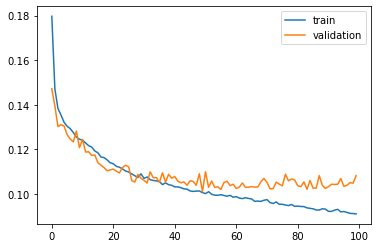

In [7]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()